<a href="https://colab.research.google.com/github/isamsami/Battery-Pack-SOH-Prediction/blob/main/SOHpredicter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression Model
Train a Linear Regression model to predict battery SOH.

Evaluate performance using metrics such as:
R², mean squared error(mse), mean absolute error(mae)

Implement the 0.6 threshold rule for battery classification
 could also be another variable implemented by the user

 *To see the final result please press run all. I have commented print commands to show that each step will run

## install dependencies


In [ ]:
!pip install pandas numpy scikit-learn matplotlib openai

In [48]:
!pip install openpyxl pandas
import pandas as pd

## Import dataset


In [49]:
dataset = pd.read_excel('/content/PulseBat Dataset.xlsx')
#dataset.head()
#dataset.info()


## Aggregate and process Data


In [50]:
columns = [f'U{i}' for i in range(1, 21)]
dataset['ave_SOH'] = dataset[columns].mean(axis=1)

X = dataset[columns]
y = dataset['ave_SOH']

#print(y)

## adding noise to model

In [56]:
import numpy as np

noisy_X = X + np.random.normal(loc=0, scale=0.01, size=X.shape)

#print(noisy_X)

           U1        U2        U3        U4        U5        U6        U7  \
0    3.481828  3.516844  3.551067  3.492720  3.483058  3.470542  3.438425   
1    3.477510  3.515499  3.517918  3.519251  3.499811  3.490952  3.435417   
2    3.478601  3.492045  3.532053  3.538124  3.483082  3.469983  3.420939   
3    3.487209  3.513907  3.540775  3.528823  3.513790  3.480860  3.438686   
4    3.498835  3.516879  3.553608  3.506250  3.513438  3.476124  3.443358   
..        ...       ...       ...       ...       ...       ...       ...   
665  3.861587  3.866815  3.882452  3.872981  3.870845  3.860865  3.820602   
666  3.871025  3.875921  3.874347  3.873143  3.881346  3.865978  3.854282   
667  3.900964  3.912122  3.926948  3.910647  3.894823  3.889511  3.880871   
668  3.938000  3.959306  3.969010  3.936464  3.958022  3.922461  3.917151   
669  3.940391  3.963286  3.943489  3.953931  3.935779  3.928190  3.919935   

           U8        U9       U10       U11       U12       U13       U14  

## Split data for training and testing


In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(noisy_X, y, test_size=0.2, random_state=42)

#print(X_test)


           U1        U2        U3        U4        U5        U6        U7  \
361  3.737618  3.736966  3.753507  3.740542  3.733698  3.724019  3.717231   
158  3.570420  3.602917  3.592261  3.600999  3.580777  3.571806  3.528911   
480  3.835260  3.875582  3.858421  3.851292  3.845116  3.828559  3.823120   
640  3.882628  3.889794  3.907282  3.891822  3.878226  3.880915  3.863099   
275  3.659234  3.664343  3.662950  3.661392  3.641198  3.628163  3.619019   
..        ...       ...       ...       ...       ...       ...       ...   
539  3.862048  3.872059  3.868070  3.878605  3.845568  3.843243  3.854044   
420  3.721035  3.746264  3.757261  3.737725  3.731305  3.698086  3.690750   
551  3.864692  3.867528  3.885843  3.865418  3.866225  3.842027  3.833185   
212  3.629323  3.657302  3.691237  3.664745  3.672633  3.632791  3.583203   
18   3.469481  3.499476  3.508610  3.522269  3.493340  3.457923  3.435633   

           U8        U9       U10       U11       U12       U13       U14  

## Train linear model


In [52]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

## Evaluate model

In [60]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

y_predict = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_predict))
print("MSE:", mean_squared_error(y_test, y_predict))
print("MAE:", mean_absolute_error(y_test, y_predict))


R² Score: 0.999689690190141
MSE: 5.382745534046695e-06
MAE: 0.0019243904705284086


## Apply threshold logic


In [61]:
threshold = 0.6
status = ["Healthy" if soh >= threshold else "Problem" for soh in y_predict]

# If we want to ask the user to input a threshold we can change threshold
#threshold = float(input("Enter SOH threshold: ")

#print(status)

['Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy'

## Create graph of predictions

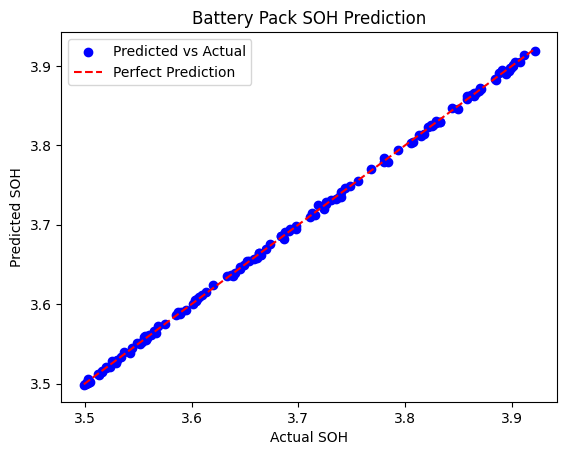

In [62]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_predict, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel("Actual SOH")
plt.ylabel("Predicted SOH")
plt.title("Battery Pack SOH Prediction")
plt.legend()
plt.show()


##